# Tasks
This is a jupyter file containing my solutions to the tasks assessments in my 4th year module "Emerging Technologies". 
Author Conor Rabbitte (conorrrabbitte.it3@gmail.com)

***

## <center>Task 1: Calculate the square root of 2</center>
The first task is to create a python function called **sqrt2** that calculates and prints to the screen the square root of 2 to 100 decimal places. I will achieve this by using a well known and popular root-finding algorithm known as Newton's method (also known as Newton-Raphson method) [1].

$$ x_{n+1} = x_{n} - \frac{f(x_{0})}{f'(x_{0})} $$

### Understanding Newton's Method
Newton's method "produces successively better approximations to the roots (or zeroes) of a real-valued function". This means that with ever iteratation we get closer to the "real-answer" of what the root of a given number is. Starting with the function $f$ defined for $x$ we can get the derivative [3] $f'$ and with an initial guess of $x_{0}$ for the root of $f$. Then we can use the algorithm above to solve for an answer $x_{1}$ and repeat the algorithm.

### Example
Lets find the square root of a number $a$, that is to say the positive number $x$ such that $x^2=a$. By finding the zero of the function $f(x)=x^2-a$ we can find the derivative $f'(x)=2x$.
For example, if we try to find the sqaure root of $a=2$, with an initial guess $x_{0}=1.4$ (initial estimation comes from the graph below) the sequence given by Newton's method is:

$$ x_{1} = x_{0}-\frac{f(x_{0})}{f'(x_{0})} = 1.4-\frac{1.4^2-2}{2*1.4} = 1.4142$$

If we then repeat this method using the previous answer as $x_{1}=1.4142$ we will get better approximation of the root.

$$ x_{2} = x_{1}-\frac{f(x_{1})}{f'(x_{1})} = 1.4142-\frac{1.4142^2-2}{2*1.4142} = 1.414213562$$


<img src="img/Square_root_graph.png">

### Python code of the function

In [1]:
def sqrt2():
    """
    A function used to test and calculate the square root of the number 2 using Newton's method.
    """
    # Square root number a.
    a = 2
    # Initial guess for the square root x.
    x = 1.4
    # Loop until we're happy with the accuracy (no more then 1e -14).
    while abs(a - (x * x)) > 0.00000000000001:
        # Calculate a better guess for the square root.
        x -= (x * x - a) / (a * x)
    # Store result of x in result.
    result = x
    # Print result to screen to 100 decimal places.
    print("%.100f" % result)    

### Testing Function Sqrt2

In [2]:
# Test the function sqrt2().
sqrt2()

1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


## Conclusion
As demonstrated above we can use Newton's method to find the square root of a given number.  With each iteration producing successively better approximations. However some numbers, such as $2$, cannot be expressed as a ratio of natural numbers. Known as 'irrational numbers' these numbers have non-repeating decimal expansions that cannot be expressed as a fraction.

In conclusion there is nothing to fear as modern mathematicians from irrational numbers, unlike the ancient Pythagoreans, they make perfect sense to us so there is no need to go hurling people overboard [4].

## References
[1] Newton's Method; Wikipedia; https://en.wikipedia.org/wiki/Newton%27s_method

[2] A Tour of Go; Exercise: Loops and Functions; https://tour.golang.org/flowcontrol/8

[3] Derivative; Wikipedia; https://en.wikipedia.org/wiki/Derivative

[4] The Sqaure Root of 2; CosmosMagazine; Paul Davies; https://cosmosmagazine.com/mathematics/the-square-root-of-2/;

***

## <center>Task 2: Proving the value of a Chi-squared test</center>
The second task is to create a python program that will Chi-squared test the categorical data found in the table below. Given the Chi-squared value based on the data below is approximately 24.6, the task is to verify this is the correct answer.

|              | A   | B   | C   | D   | Total |
| :----------- | :-: | :-: | :-: | :-: | --:   |
| White collar | 90  | 60  | 104 | 95  | 349   |
| Blue collar  | 30  | 50  | 51  | 20  | 151   |
| No collar    | 30  | 51  | 45  | 35  | 150   |
<br>
| Total        | 150 | 150 | 200 | 150 | 650   |



### Understanding the Chi-squared statistic
The chi-squared statistic is a measure of the differenece between observed and expected frequencies of outcomes from a set of events or variables. The data used in calculating a chi-square statistic must be randomly drawn from independent variables. When the observed data is categorized into a table, like the one above, we can calculate the expected results using a simple calculation. For example if we take the column *'A'* and row *'White Collar'* and plug them into our formula we will get the expected result of 80.54.

$$ C * \frac{R}{T} = 150 * \frac{349}{650} = 80.54 $$

Where:
- *__C__* is the Total in a given Column
- *__R__* is the Total in a given Row
- *__T__* is the Tables Total

Using this formula across the entire table gives us a list of expected results corresponding to our observed results. Following this we can use another formula across each cell in the table whose sum total will give us our test statistic.

$$ \frac{(observed - expected)^2}{expected} = \frac{(90 - 80.54)^2}{80.54} = 1.11 $$

The sum total of this forumla across all the cells of the given table yields __24.6.__
Finally we can calculate the *Degrees of Freedom* using another simple formula

$$ (Number Of Rows - 1)(Number Of Columns - 2) = (3-1)(4-1) = 6 $$

<br>

\*\*This walkthrough of the Chi-squared statistic was taken from *Wikipedia* [2] and *investopedia* [5]. It is not my own work, but my interpretation that serves as explanation of the inner workings of the chi-squared statistic which I will program in python below.

### Python code - Chi-square statistic test
The attempt below was constructed using the guide found at pythonhealthcare.org [1]

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [4]:
data = pd.DataFrame(columns=['A', 'B', 'C', 'D'])

In [5]:
data.loc['White Collar'] = [90, 60, 104, 95]
data.loc['Blue Collar'] = [30, 50, 51, 20]
data.loc['No Collar'] = [30, 40, 45, 35]

In [6]:
data

,A,B,C,D
White Collar,90,60,104,95
Blue Collar,30,50,51,20
No Collar,30,40,45,35


## Chisqaure Contingency Method
In the scipy.stats we can call on the method chi2_contingency [3]. This function computes the chi-sqaure statistic and p-value. It returns four values and takes two parameters.

In [7]:
chi2, p, dof, expected = stats.chi2_contingency(data, correction=False)

In [8]:
chi2

24.5712028585826

In [9]:
p

0.0004098425861096696

In [10]:
dof

6

In [11]:
expected

array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
       [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
       [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]])

## Conclusion
In conclusion we can see that the chi2_contingency function used from the scipy.stats import is accurate and gives us the desired result of **24.6.** As seen in the walkthrough section *Understanding the Chi-squared statistic* our first expected result of **80.54** matches the first expected result of the chi2_contingency. Furthermore, we can see that the calculated degrees of freedom for both the walkthrough and the chi2_contingency are **6.** Based on the table given and the approximate result, the chi2_contingency proves the correct and accurate answer for the Chi-squared value is **24.6.**

## References
[1] Statistics: Chi-sqaured test; pythonhealthcare.org; https://pythonhealthcare.org/2018/04/13/58-statistics-chi-squared-test/ 

[2] Chi-squared test; Wikipedia.org https://en.wikipedia.org/wiki/Chi-squared_test

[3] Contingency; SciPy.org Documentation; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

[4] Chisquare; SciPy.org Documentation; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

[5] Chi-Square (χ2) Statistic Definition; investopedia.com; https://www.investopedia.com/terms/c/chi-square-statistic.asp

***

## <center>Task 3: Standard Deviation</center>
The third task is to perform a simulation of a standard deviation calculation used in Microsoft's Excel, known as STDEV.S. Furthur, demonstrate that STDEV.S calculation is a better estimation for the standard deviation of a population when performed on a sample.

### Defining the difference
*__Standard Deviation (SD):__* measures the amount of *variation* or the *spread* of a data distribution. It measures the distance between each data point and the mean. A low SD indicates the data is close to the mean while a high SD indicates the data is spread out over a wider range.

*__Population (P):__* is a set of data that contains *all* memebers of a specified group. This is the entire list of values in a given data set.

*__Sample (S):__* is a set of data that contains only *part*, or a *subset*, of a population. A sample inherently is always less then the size of the population from which is it taken.

The distinctions between *__P__* and *__S__* are very important when we are working with statistical data. It is important because in a *__P__* data set we have all the data we need to make an accurate statistical analysis *__BUT__* in a *__S__* data set we have only a portion of the data and therefore need to compensate for this fact, to help give us a more accurate result. When we are working with a given data set and asked to find the *__SD__* the answer will vary on wether the data set is of type *__P__* or type *__S__*. 


### Population standard deviation
The mathematical formula for the population standard deviation is as follows, where $\sigma$ represents the _population standard deviation:_

$$\sigma = \sqrt{ \frac{\Sigma(x_{i}-\mu)^2}{n} }$$

While this may look complicated I will break the formula down into simple steps.

1. $\mu$: Calculate the mean of the population data.
2. $x_{i}$: Subtract the mean from each data point _(i)_ in the given data set, this is called a deviation.
3. Square each deviation to make it a positive number.
4. $\Sigma$: Sum all squared deviations together.
5. $n$: Divide the sum by the number of data points in the population, this is call the variance.
6. Take the square root of the variance to get the standard deviation.

### Sample standard deviation
The mathematical formula for the sample standard deviation is as follows, where $s_{x}$ represents the _sample standard deviation:_

$$s_{x} = \sqrt{ \frac{\Sigma(x_{i}-\bar{x})^2}{n-1} }$$

Much like the formula for population, this sample formula takes all the same steps with $\bar{x}$ replacing $\mu$ and one small, but crucial, difference in step 5. 

5. $n-1$: Divide the sum by one less than the number of data points in the sample, this is called the variance.

### Population Standard Deviation Example
A teacher wants to compare a classroom of 12 students and calculate the standard deviation of their grades for a recent python assessment. The teacher arranges a list of _all_ the students grades(ranging from 1 - 10) below:

_**Grades**_ = [3, 5, 6, 9, 10, 2, 4, 5, 7, 8, 4, 2]

Using the _population_ standard deviation formula we can calculate the answer.

$$\sigma = \sqrt{ \frac{\Sigma(x_{i}-\mu)^2}{n} }$$

Calculate the mean of the list grades:

$$\mu = \frac{3 + 5 + 6 + 9 + 10 + 2 + 4 + 5 + 7 + 8 + 4 + 2}{12} = \frac{63}{12} = 5.42$$

With the mean of **5.42** calculate the deviations of each element in the list and then sqaure them:

| Grade: $x_{i}$ | Deviation: $(x_{i} - \mu)$ | Squared deviation: $(x_{i} - \mu)^2$ |
| :----------: | :-: | :-: |
| 3 | 3 - 5.42 = -2.42 | (-2.42)$^2$ = 5.84 |
| 5 | 5 - 5.42 = -0.42 | (-0.42)$^2$ = 0.17 |
| 6 | 6 - 5.42 = 0.58 | (0.58)$^2$ = 0.34 |
| 9 | 9 - 5.42 = 3.58 | (3.58)$^2$ = 12.84 |
| 10 | 10 - 5.42 = 4.58 | (4.58)$^2$ = 21.00 |
| 2 | 2 - 5.42 = -3.42 | (-3.42)$^2$ = 11.67 |
| 4 | 4 - 5.42 = -1.42 | (-1.42)$^2$ = 2.00 |
| 5 | 5 - 5.42 = -0.42 | (-0.42)$^2$ = 0.17 |
| 7 | 7 - 5.42 = 1.58 | (1.58)$^2$ = 2.50 |
| 8 | 8 - 5.42 = 2.58 | (2.58)$^2$ = 6.67 |
| 4 | 4 - 5.42 = -1.42 | (-1.42)$^2$ = 2.00 |
| 2 | 2 - 5.42 = -5.42 | (-5.42)$^2$ = 11.67 |

Add the squared deviations $(x_{i} - \mu)^2$ together.

$$\Sigma = (5.84 + 0.17 + 0.34 + 12.84 + 21.00 + 11.67 + 2.00 + 0.17 + 2.50 + 6.67 + 2.00 + 11.67) = 76.92$$

Divide the sum total $\Sigma$ by the number of values in grades.

$$ \frac{\Sigma(x_{i}-\mu)^2}{n} = \frac{76.92}{n} = \frac{76.92}{12} = 6.40$$

Take the square root of the result above.

$$\sqrt{6.40} \approx{2.53}$$

The _population_ standard deviation is approximately **2.53.**

#### Python code for Population Standard Deviation

In [12]:
# Import numpy for math functions sqrt, sum, mean 
import numpy as np

In [13]:
# Create a list of populationGrades from example above
populationGrades = [3, 5, 6, 9, 10, 2, 4, 5, 7, 8, 4, 2]

In [14]:
def population(grades):
    """
    A function that takes in a list as parameter and then performs
    a Population Standard Deviation calculation based on the list, using numpy.
    Returns the full calculated answer as a float.
    """
    return np.sqrt(np.sum((grades - np.mean(grades))**2)/len(grades))

In [15]:
# Call method passing populationGrades as a parameter
population(populationGrades)

2.5317429218272185

As demonstrated above in the example the _population_ standard deviation is approximately **2.53** and our python coded example, using the same list of grades, reflects that accuracy.

### Sample Standard Deviation
A teacher wants to compare a select group of 4 students from a an entire classroom of 12 and then calculate the standard deviation of their grades for a recent python assessment. The teacher arranges a _subset_ list of the students grades(ranging from 1 - 10) below:

_**Grades**_ = [3, 5, 6, 9]

Using the _sample_ standard deviation formula we can calculate the answer.

$$s_{x} = \sqrt{ \frac{\Sigma(x_{i}-\bar{x})^2}{n-1} }$$

Calculate the mean of the list grades:

$$s_{x} = \frac{3 + 5 + 6 + 9}{4} = \frac{23}{4} = 5.75$$

With the mean of **5.75** calculate the deviations of each element in the list and then sqaure them:

| Grade: $x_{i}$ | Deviation: $(x_{i} - \bar{x})$ | Squared deviation: $(x_{i} - \bar{x})^2$ |
| :-: | :-: | :-: |
| 3 | 3 - 5.75 = -2.75 | (-2.75)$^2$ = 7.56 |
| 5 | 5 - 5.75 = -0.75 | (-0.75)$^2$ = 0.56 |
| 6 | 6 - 5.75 = 0.25 | (0.25)$^2$ = 0.06 |
| 9 | 9 - 5.75 = 3.25 | (3.25)$^2$ = 10.56 |

Add the squared deviations $(x_{i} - \bar{x})^2$ together.

$$\Sigma = (7.56 + 0.56 + 0.06 + 10.56) = 18.74$$

Divide the sum total $\Sigma$ by the number of grades - 1.

$$\frac{\Sigma(x_{i}-\bar{x})^2}{n-1} = \frac{18.74}{n-1} = \frac{18.74}{3} = 6.25$$

Take the square root of the result above.

$$\sqrt{6.25} \approx{2.5}$$

The _sample_ standard deviation is approximately **2.5.**

#### Python code for Sample Standard Deviation

In [16]:
# Import numpy for math functions sqrt, sum, mean 
import numpy as np

In [17]:
# Create a list of sampleGrades from example above
sampleGrades = [3, 5, 6, 9]

In [18]:
def sample(grades):
    """
    A function that takes in a list as parameter and then performs
    a Sample Standard Deviation calculation based on the list, using numpy.
    Returns the full calculated answer as a float.
    """
    return np.sqrt( np.sum( (grades - np.mean(grades))**2) / (len(grades)-1) )

In [19]:
sample(sampleGrades)

2.5

As demonstrated above in the example the _sample_ standard deviation is approximately **2.5** and our python coded example, using the same list of grades, reflects that accuracy.

### Using the wrong type of Standard Deviation.
What if we decided to calculate the _sample_ standard deviation using the first list of grades, which contains _all_ the students grades. Would there be much of a difference between the two answers? 
Yes there would be a difference. This is because while we have _all_ the students results in the classroom we are still using a formula which compensates for a missing portion, which we have.

#### Python code for a Wrong use of Standard Deviation

In [20]:
# Import numpy for math functions sqrt, sum, mean 
import numpy as np

# Create a list x which contains the same number and values as populationGrades
x = [3, 5, 6, 9, 10, 2, 4, 5, 7, 8, 4, 2]

# Calculate the sample standard deviation of the list and print the answer
print(np.sqrt( np.sum( (x - np.mean(x))**2) / (len(x)-1) ))

2.6443192398846707


## Conclusion
When calculating the standard deviation (SD) of any given data set we must determine wether the data set represents _all_ or _part_ of the category of data. Based on this decision we will use either the _Poulation_ SD or the _Sample_ SD. As we have seen above with examples the _Population_ SD answer was **2.53** while the _Sample_ SD answer was **2.5** leaving only **0.03** in the difference $(2.53 - 2.5 = 0.03)$. It proves using the _Sample_ SD formula helps compenstate for the missing data and still gives us an accurate result with a marginal difference. As we have seen using the wrong type of formula will result in **2.64** giving us a difference of **0.14** $(2.64 - 2.5 = 0.14)$ almost five times the differences when used incorrectly.
<br>
<br>
In conclusion the _Sample_ SD formula is a better estimate for the SD of a data set when performed on a sample.

## References
[1] Population and sample standard deviation review; khanacademy; https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review

[2] Standard Deviation; Wikipedia; https://en.wikipedia.org/wiki/Standard_deviation

[3] Population vs Sample Data; mathbitsnotebook; http://mathbitsnotebook.com/Algebra1/StatisticsData/STPopSample.html

[4] numpy.std; numpy; https://numpy.org/doc/stable/reference/generated/numpy.std.html#:~:text=The%20standard%20deviation%20is%20the,N%20%3D%20len(x)%20

[5] LaTeX mathematical symbols; oeis.org; https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols

***

## <center>Task 4: *k*-means clustering on the Iris data set</center>

The fourth and final task is to apply a *k*-means clustering, using scikit-learn, to Fisher's famous Iris data set. Then demo a coded example explaining its accuracy. Finally explain how the model could be used to make predictions of species of iris.

### K-Means Clustering
The K-Means Clustering is an unsupervised machine learning method that uses vector quantization to identify clusters of data objects in a dataset. It achieves this by partitioning *n* observations into *k* clusters in which each observation belongs to the cluster with the nearest mean (known as centroid) serving as a prototype of the cluster [2].

*This algorithm has a relationship to the k-nearest neighbour, another popular **supervised** machine learning method for classification.*

### Fisher's *Iris* data set 
The Fisher's *Iris* flower data set is a multivariate data set created by statistican, eugenicist, and biologist Ronald Fisher [3]. This data set consists of 50 samples from each of the three species of the Iris flower i.e. Iris setosa, Iris virginica, Iris versicolor. Four different features were measured for each of the samples: the length and width of the sepals and petals, in centimeters.


### K-Means Clustering Walkthrough using Python code
As we code our k-means clustring test using the Iris data set, we need to import a few different packages. Most will be explained as they appear throughout the walkthrough but take special note of the sklearn.datasets import load_iris. This allows us to import the entirety of Fisher's Iris data set [4, 5, 6].

In [21]:
# Imports
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set Iris data set variable
iris = load_iris()

In [22]:
# Create a DataFrame with the Iris data set and display the head
dataF = pd.DataFrame(iris.data, columns=iris.feature_names)
dataF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Scaling the data
Because we are working with a varying scale and size of data it is good practice to scale in order to center the data. If we plot the data have the X-axis range from a signifcantly larger number of 10,000 - 100,000, and then have the Y-axis range from 1 - 10, we could end up with an inaccurate representation of the data. While not always necessary we can solve this problem with scaling.

In [23]:
# Preprocessing used to scale the data set for accuracy and fit_transform
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(dataF)

In [24]:
# Display 5 entries of the new scaled data set 
scaled_iris[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

#### Make a k-means prediction
Next using the KMeans import we create a new k-means and set the clusters equal to 3. We use 3 because we already know the Fisher's Iris data set contains 3 different species, Later we will look at the eblow and silhouette coefficient to predict the number of clusters in a given data set. 

The k-means prediction returns to us an array containing an entry of every dataset and which cluster it predicted they belonged to.

In [25]:
# Set the number of clusters to 3 and predict based on the scaled_iris set
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(scaled_iris)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

#### Centroids
The k-means cluster_centers_ also known as the centroids are the mean point of a given cluster. Below we have 3 centriods one for every cluster group.

In [26]:
kmeans.cluster_centers_

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [27]:
# Create new DataFrame to using the scaled_iris and add the clusters
dF = pd.DataFrame(scaled_iris, columns=iris.feature_names)
dF['clusters'] = y_predicted
dF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


#### Ploting the Points
Using the final DataFrame *dF* with the clusters added we create 3 new variables, *df_1, df_2, and df_3* which will each represent clusters 1, 2, and 3, respectively. Next we plot all 3 points using a scatter plot and color each one to be easily distinguished adding the centroids to the scatter plot as well to visually mark the mean (Average) of the clusters. We do this for the Petals length & width, and then the Sepals length & width [7].

In [28]:
df_1 = dF[dF.clusters==0]
df_2 = dF[dF.clusters==1]
df_3 = dF[dF.clusters==2]

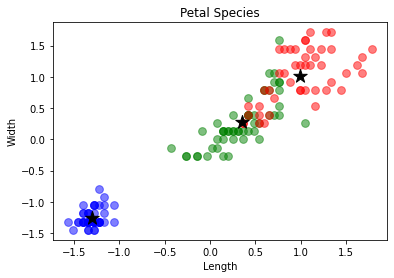

In [29]:
# Plot all 3 clusters with centroids for Petal length & width
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'], s=60, color='blue', alpha=0.5)
plt.scatter(df_2['petal length (cm)'], df_2['petal width (cm)'], s=60, color='green', alpha=0.5)
plt.scatter(df_3['petal length (cm)'], df_3['petal width (cm)'], s=60, color='red', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s=200, color='black', marker='*', label='centroid')
plt.title('Petal Species')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

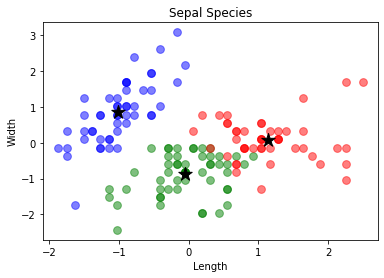

In [30]:
# Plot all 3 clusters with centroids for Sepal length & width
plt.scatter(df_1['sepal length (cm)'], df_1['sepal width (cm)'], s=60, color='blue', alpha=0.5)
plt.scatter(df_2['sepal length (cm)'], df_2['sepal width (cm)'], s=60, color='green', alpha=0.5)
plt.scatter(df_3['sepal length (cm)'], df_3['sepal width (cm)'], s=60, color='red', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, color='black', marker='*', label='centroid')
plt.title('Sepal Species')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

### Predicting Clusters with the Elbow Method and Silhouette Coefficient
The methods below are a recreation of a tutorial found at Real Python [1]. This is done in order to demonstrate the accuracy of the *k-means* method.

#### Elbow Method
The Elbow method is used to evaluate the appropriate number of clusters but running serveral *k-means* incrementing *k* with each iteration and record the sum of squared errors (SSE). As we increment the k the SSE will continue to decreases. If we visually plot this we can see there is a distinct spot were the graph takes a sharp bend. This is the **Elbow Point**. This is considered as a reasonable trade-off betwen the SSE and the number of clusters, *k*.

In [31]:
# For each K in 10 loops; set clusters to k; make prediction on scaled_iris; append to SSE
SSE = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit_predict(scaled_iris)
    SSE.append(km.inertia_)

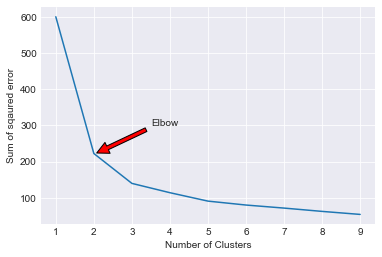

In [32]:
# Plot the SSE and k (num. clusters) on a visual graph
plt.style.use('seaborn-darkgrid')
plt.plot(range(1, 10), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of sqaured error')
plt.annotate('Elbow', xy=(2,220), xytext=(3.5,300),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

#### Silhouette Coefficient
The Silhouette Coefficient is a measure of cluster cohesion and separation. It decideds which data point belongs to which cluster based on how close the data point is to other data points in the cluster, and how far away the data point is from points in other clusters.

    **Note: The Silhouette Coefficient needs a minimum of two clusters, or it will throw an exception [8].

In [33]:
# For each K in 10 loops beginning at 2; set clusters to k; 
# Make prediction on scaled_iris; set silhouette_Score and append it to array
silhouette_coefficients = []
for k in range(2, 10):
    km2 = KMeans(n_clusters=k)
    km2.fit_predict(scaled_iris)
    score = silhouette_score(scaled_iris, km2.labels_)
    silhouette_coefficients.append(score)

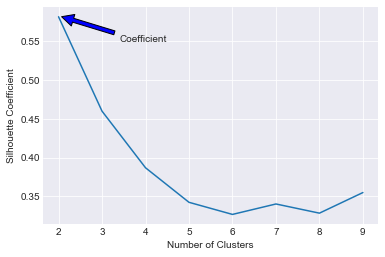

In [34]:
# Plot the Silhouette Coefficient and k (num. clusters) on a visual graph
plt.style.use('seaborn-darkgrid')
plt.plot(range(2, 10), silhouette_coefficients)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.annotate('Coefficient', xy=(2,0.583), xytext=(3.4,0.55),
            arrowprops=dict(facecolor='blue', shrink=0.05))
plt.show()

## Conclusion
In conclusion the *k-means* method is sufficiently accurate at predicting the differiences in the iris species. As we already know the iris data set contains 3 different species so simply setting the clusters in *k-means* to 3 achieves accurate results. However, given the eblow method and silhouette coeffiecient it is evident that the *k-means* prediction fails to recognise the 3 different species as both recommand using 2 clusters. This is not entirely inaccurate as two of the speices; versicolor and virginica share similar petal and sepal sizes [9]. 

I think my model has proven to be able to predict 3 different species of the iris data set with high accuracy. While this leaves us with an accurate result, we could concluded that if we paired the *k-means* method with another method such as the *K Nearest-Neighbour (KNN)* we would get a more accurate result.

## References
[1] K-Means Clustering in Python: A Practical Guide; Realpython; https://realpython.com/k-means-clustering-python/

[2] K-Mean Clustering; Wikipedia; https://en.wikipedia.org/wiki/K-means_clustering

[3] Iris Data Set; Wikipedia; https://en.wikipedia.org/wiki/Iris_flower_data_set

[4] A demo of K-Means clustering on the handwritten digits data; scikit-learn; https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

[5] Clustering; scikit-learn; https://scikit-learn.org/stable/modules/clustering.html#k-means

[6] Demonstration pf K-Means assumptions; scikit-learn; https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

[7] Matplotlib: Visualization with Python; matplotlib; https://matplotlib.org/devdocs/index.html

[8] Silhouette Score; scikit-learn; https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

[9] Principle Tree for Iris data set; Wikipedia; https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Principal_tree_for_Iris_data_set.png

***